# Executed environment: Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Adding imports

In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import string
import random

## Adding functions

In [3]:
def accuracy_plot(history, l1_name, l2_name, l3_name, l4_name, l5_name):
  """
  Function to plot evolution of accuracy by epoch, 
  observe the output layer names for each character from the model summary
  and use as argument of this function
  """
  layer_list = [l1_name, l2_name, l3_name, l4_name, l5_name]
  plt.figure(figsize=(10,10))

  for i in range(5):
    plt.subplot(321 + i)
    title_text = 'Classification Accuracy - character #' + str(i+1)
    plt.title(title_text)
    a1_text = layer_list[i] + '_accuracy'
    a2_text = 'val_' + layer_list[i] + '_accuracy'
    plt.plot(history.history[a1_text], color='blue', label='train')
    plt.plot(history.history[a2_text], color='orange', label='test')


In [4]:
def accuracy_reporting(prediction, test_labels):
  """
  Function to print accuracy at character level and sample level
  """
  # Build list of predicted characters
  results=[]
  for i in range(prediction.shape[1]):
    for j in range(prediction.shape[0]):
        results.append(symbols[np.argmax(prediction[j][i])])
  
  # Builde list of expected characters
  test_char = []
  for i in test_labels:
    test_char.append(list(i))

  test_char = np.array(test_char)
  test_char = test_char.flatten()
  test_char=list(test_char)

  # Build list of prediction accuracy at character level
  # Also a list of misclassified characters
  misclass_list = []
  score_list = []
  for i in range(len(results)):
    if results[i] == test_char[i]:
      score_list.append(1)
    else:
      score_list.append(0)
      misclass_list.append([i%5, test_char[i], results[i]])

  # Reshape the list in chuncks of 5 to match batch size
  n = 5
  score_list_2 = []

  for i in range(0, len(score_list), n):  
    score_list_2.append(score_list[i:i + n]) 

  # Build the list of number of accurate character predictions at each sample in the batch
  score_list_captcha = []

  for i in score_list_2:
    score_list_captcha.append(sum(i))

  # Calculate character-level accuracy and sample-level accuracy
  accuracy_2 = (sum(score_list)/len(test_char))*100
  full_captcha_accuracy = ( score_list_captcha.count(5) / len(score_list_captcha) ) * 100
  
  print("Percentage accuracy (individual character): " + str(accuracy_2))
  print("Percentage accuracy (full captcha): " + str(full_captcha_accuracy))

  return misclass_list

In [161]:
def misclass_sum (misclass_list):
  """
  Function to get the sum of misclassified chars
  """
  mclist_len = len(misclass_list)
  misclass_list = pd.DataFrame(misclass_list, columns=['Char Position', 'Expected', 'Predicted'])

  mcdf1 = pd.DataFrame(misclass_list.groupby(by=['Expected', 'Predicted']).count())
  mcdf2 = pd.DataFrame(mcdf1.groupby(level=0).apply(lambda x: 100 * x / mclist_len))
  mcdf3 = pd.concat([mcdf1,mcdf2], axis=1)
  mcdf3.columns = ["Count", "Pct Share"]

  print('Grouping by Expected vs Predicted Character')
  print(mcdf3)

  mcdf4 = pd.DataFrame(misclass_list.groupby(by=['Char Position']).count())['Expected']
  mcdf5 = pd.DataFrame(mcdf4.groupby(level=0).apply(lambda x: 100 * x / mclist_len))
  mcdf6 = pd.concat([mcdf4,mcdf5], axis=1)
  mcdf6.columns = ["Count", "Pct Share"]

  print()
  print('Grouping by Location of Prediction Error')
  print(mcdf6)  


In [5]:
import os,fnmatch
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CET023_input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/AN8008_input/ml_data_3188.csv
/content/drive/MyDrive/AN8008_input/ml_test_3188.csv
/content/drive/MyDrive/AN8008_input/samples/2n73f.png
/content/drive/MyDrive/AN8008_input/samples/36nx4.png
/content/drive/MyDrive/AN8008_input/samples/34pcn.png
/content/drive/MyDrive/AN8008_input/samples/3bd8f.png
/content/drive/MyDrive/AN8008_input/samples/28x47.png
/content/drive/MyDrive/AN8008_input/samples/34fxm.png
/content/drive/MyDrive/AN8008_input/samples/3n3cf.png
/content/drive/MyDrive/AN8008_input/samples/23n88.png
/content/drive/MyDrive/AN8008_input/samples/33p4e.png
/content/drive/MyDrive/AN8008_input/samples/2yggg.png
/content/drive/MyDrive/AN8008_input/samples/3c7de.jpg
/content/drive/MyDrive/AN8008_input/samples/28348.png
/content/drive/MyDrive/AN8008_input/samples/2gyb6.png
/content/drive/MyDrive/AN8008_input/samples/3den6.png
/content/drive/MyDrive/AN8008_input/samples/3x325.png
/content/drive/MyDrive/AN8008_input/samples/2cgyx.png
/content/drive/MyDrive/AN8008_

In [6]:
#Only Selecting the Images and excluding the directories in the folder
images_names=fnmatch.filter(os.listdir('/content/drive/MyDrive/CET023_input/samples/'),'*.*')

In [ ]:
print(images_names)

['2n73f.png', '36nx4.png', '34pcn.png', '3bd8f.png', '28x47.png', '34fxm.png', '3n3cf.png', '23n88.png', '33p4e.png', '2yggg.png', '3c7de.jpg', '28348.png', '2gyb6.png', '3den6.png', '3x325.png', '2cgyx.png', '37ep6.png', '3ebpw.png', '3pe4g.png', '36w25.png', '264m5.png', '34b84.png', '253dc.png', '25257.png', '38n57.png', '2npg6.png', '3p67n.png', '33n73.png', '325fb.png', '23mdg.png', '243mm.png', '2g7nm.png', '24f6w.png', '3d7bd.png', '3n7mx.png', '2w4y7.png', '3nw7w.png', '5wddw.png', '4ycex.png', '4dw3w.png', '573bn.png', '4b2pw.png', '5n3w4.png', '5mf7c.png', '5mcy7.png', '43gey.png', '646x8.png', '467d5.png', '65nmw.jpg', '556wd.png', '5p8fm.png', '5fyem.png', '4nnf3.png', '474ff.png', '478nx.png', '53wb8.png', '4w76g.png', '5dxnm.png', '4fp5g.png', '5p3mm.png', '5mnpd.png', '5yxgp.png', '537nf.png', '5nm6d.png', '57gnx.png', '5x7x5.png', '53mn8.png', '62nb3.png', '488de.png', '4nc37.png', '46mbm.png', '53wp3.png', '43xfe.png', '4fc36.png', '44xe8.png', '662bw.png', '4m2w5.png'

In [135]:
# Seprating the file extension from the Image Name.
outputs=[]
for name in images_names:
    outputs.append(name[0:5])

In [ ]:
print(outputs)

['2n73f', '36nx4', '34pcn', '3bd8f', '28x47', '34fxm', '3n3cf', '23n88', '33p4e', '2yggg', '3c7de', '28348', '2gyb6', '3den6', '3x325', '2cgyx', '37ep6', '3ebpw', '3pe4g', '36w25', '264m5', '34b84', '253dc', '25257', '38n57', '2npg6', '3p67n', '33n73', '325fb', '23mdg', '243mm', '2g7nm', '24f6w', '3d7bd', '3n7mx', '2w4y7', '3nw7w', '5wddw', '4ycex', '4dw3w', '573bn', '4b2pw', '5n3w4', '5mf7c', '5mcy7', '43gey', '646x8', '467d5', '65nmw', '556wd', '5p8fm', '5fyem', '4nnf3', '474ff', '478nx', '53wb8', '4w76g', '5dxnm', '4fp5g', '5p3mm', '5mnpd', '5yxgp', '537nf', '5nm6d', '57gnx', '5x7x5', '53mn8', '62nb3', '488de', '4nc37', '46mbm', '53wp3', '43xfe', '4fc36', '44xe8', '662bw', '4m2w5', '5nxnn', '573d8', '4433m', '4d22m', '4exnn', '658xe', '4egem', '63824', '42dw4', '55y2m', '4743p', '5bnd7', '5g5e5', '5bg8f', '57wdp', '5gcd3', '42xpy', '5n732', '5f3gf', '5npdn', '65m85', '62fgn', '5mgn4', '56ncx', '43mn5', '44fyb', '64m82', '5bb66', '4c8n8', '574d7', '47e4p', '4dgf7', '4n2yg', '52447', 

In [136]:
# Check image imported and shuffled correctly
X=[]
for name in images_names:
    im_name='/content/drive/MyDrive/AN8008_input/samples/'+name
    img=mpimg.imread(im_name)
    if name[6:9] == 'jpg':
      img = img / 255
    img=img[:,:,0]
    X.append(img)

In [137]:
shuff_index = list(range(len(X)))
random.shuffle(shuff_index)

X=np.asarray(X)
X = X[shuff_index]

outputs=np.asarray(outputs)
outputs = outputs[shuff_index]

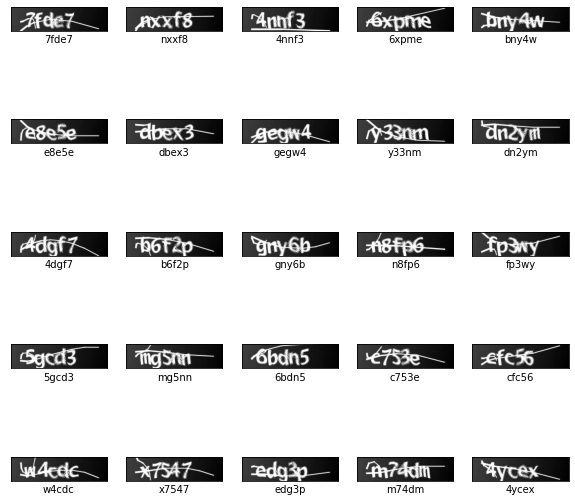

In [138]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap = 'binary')
    plt.xlabel(outputs[i])

In [139]:
# Reshape for Keras Convo2D layers
X=[]
for name in images_names:
    im_name='/content/drive/MyDrive/CET023_input/samples/'+name
    img=mpimg.imread(im_name)
    if name[6:9] == 'jpg':
      img = img / 255
    img=img[:,:,0]
    img=np.reshape(img,(50,200,1))
    X.append(img)

In [140]:
X=np.asarray(X)
X = X[shuff_index]
print("No of Images :",X.shape[0])

No of Images : 1070


In [10]:
X.shape

(1070, 50, 200, 1)

In [ ]:
print(X)

[[[[0.75294119]
   [0.75294119]
   [0.75294119]
   ...
   [0.98431373]
   [0.98431373]
   [0.98431373]]

  [[0.75294119]
   [0.75294119]
   [0.75294119]
   ...
   [0.98431373]
   [0.98431373]
   [0.98431373]]

  [[0.75294119]
   [0.75294119]
   [0.75294119]
   ...
   [0.98431373]
   [0.98431373]
   [0.98431373]]

  ...

  [[0.7647059 ]
   [0.7647059 ]
   [0.7647059 ]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.7647059 ]
   [0.7647059 ]
   [0.7647059 ]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.7647059 ]
   [0.7647059 ]
   [0.7647059 ]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]]


 [[[0.75294119]
   [0.75294119]
   [0.75294119]
   ...
   [0.98431373]
   [0.98431373]
   [0.98431373]]

  [[0.75294119]
   [0.75294119]
   [0.75294119]
   ...
   [0.98431373]
   [0.98431373]
   [0.98431373]]

  [[0.75294119]
   [0.75294119]
   [0.75294119]
   ...
   [0.98431373]
   [0.98431373]
   [0.98431373]]

  ...

  [[0.7647059 ]
   [0.7647059 ]
   [0.7

In [141]:
# one hot matrix for Y

symbols = string.ascii_lowercase + "0123456789"

y=np.zeros(shape=(5,len(outputs),len(symbols)))
for i in range(5):
    for j in range(len(outputs)):
        y[i][j][symbols.index(outputs[j][i])]=1
print("Shape of Hot Encoded Y :",y.shape)

train_X=X[:int(0.8*len(X))]
train_Y=y[:,:int(0.8*len(X)),:]
train_outputs=outputs[:int(0.8*len(X))]

validation_X=X[int(0.8*len(X)):int(0.9*len(X))]
validation_Y=y[:,int(0.8*len(X)):int(0.9*len(X)),:]
validation_outputs=outputs[int(0.8*len(X)):int(0.9*len(X))]

test_X=X[int(0.9*len(X)):]
test_Y=y[:,int(0.9*len(X)):,:]
test_outputs=outputs[int(0.9*len(X)):]

Shape of Hot Encoded Y : (5, 1070, 36)


In [142]:
print(test_outputs)

['6b46g' '34pcn' 'bcwnn' 'e25xg' '6b4w6' 'n6xc5' 'de45x' 'mmy5n' 'xbem6'
 '4c8n8' 'p4pde' '4w76g' '6f857' '24f6w' '7yf62' '8nbew' 'dn5df' 'gnf85'
 'gfbx6' '3ndxd' 'wm746' '5nggg' '5xwcg' 'wc2bd' 'nfndw' 'de7f8' 'gd4mf'
 'wbncw' 'fp382' 'ndg2b' 'yw667' 'mfb3x' 'ng46m' 'ngn26' 'pmd3w' '5bnd7'
 '5fyem' 'm5meg' 'pf5ng' 'b4y5x' '264m5' 'm22e3' '4743p' 'pcede' 'y53c2'
 '4dw3w' 'ygfwe' 'n3ffn' 'w48cw' '8bbm4' 'c2pg6' 'en4n4' '5mcy7' 'ccn2x'
 'pg2yx' 'ncww7' 'gfxcc' '6gnm3' '5x7x5' 'nf8b8' 'w8bnx' '556wd' '5g5e5'
 'feyc8' 'exycn' '3ym7f' 'gpxng' 'gcfgp' 'b685n' 'pm363' 'wce5n' 'd75b5'
 'ymp7g' '678w3' '6e6pn' 'gy5bf' 'f4fn2' 'm3wfw' 'm67b3' 'fyfbn' 'y32yy'
 'dyp7n' '7mgmf' '5pm6b' '5yxgp' 'nf7bn' 'yxd7m' 'ndme7' 'yd755' 'bm3p8'
 'c8n8c' 'bdbb3' '8cccc' '3p67n' '53mn8' 'y48c3' 'w4nfx' 'cnmnn' '3xcgg'
 'cpe63' '5npdn' 'wecfd' 'n7ebx' 'm3588' 'xfgxb' 'n373n' 'gmmne']


In [ ]:
print(y)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [143]:
# shape of train test 

print("Train X Shape",train_X.shape)
print("Train Y Shape",train_Y.shape)

print("Validation X Shape",validation_X.shape)
print("Validation Y Shape",validation_Y.shape)

print("Test X Shape",test_X.shape)
print("Test Y Shape",test_Y.shape)

Train X Shape (856, 50, 200, 1)
Train Y Shape (5, 856, 36)
Validation X Shape (107, 50, 200, 1)
Validation Y Shape (5, 107, 36)
Test X Shape (107, 50, 200, 1)
Test Y Shape (5, 107, 36)


Model 1:
 
(Conv 3x3x16) (Conv 3x3x16) (MaxPool 2x2) (Dropout 0.2) (Conv 3x3x32) (Conv 3x3x32) (MaxPool 2x2) (Dropout 0.2) (Conv 3x3x64) (Conv 3x3x64) (MaxPool 2x2) (Dropout 0.2) (Flatten) -> [5 parallel stacks of] (Dense 64) (Dropout 0.2) (Dense 36)

In [144]:
image=keras.layers.Input((50,200,1))
conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)
conv2=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(conv1)
mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
drop1=keras.layers.Dropout(0.2)(mp1)
conv3=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(drop1)
conv4=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(conv3)
mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv4)
drop2=keras.layers.Dropout(0.2)(mp2)
conv5=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(drop2)
conv6=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(conv5)
mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv6)
drop3=keras.layers.Dropout(0.2)(mp3)
flat=keras.layers.Flatten()(drop3)

out=[]
for i in range(5):     # 5 is the number of characters in the captcha.
    den1=keras.layers.Dense(64,activation='relu')(flat)
    drop4=keras.layers.Dropout(0.2)(den1)
    den2=keras.layers.Dense(36,activation='softmax')(drop4)
    out.append(den2)
model1=keras.Model(image,out)

In [145]:
model1.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 50, 200, 16)  160         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 50, 200, 16)  2320        conv2d_6[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_7[0][0]                   
____________________________________________________________________________________________

In [146]:
CNN1 = model1.fit(train_X, [train_Y[0], train_Y[1], train_Y[2], train_Y[3], train_Y[4]], batch_size=32, epochs=100,validation_data=(validation_X,[validation_Y[0],validation_Y[1],validation_Y[2],validation_Y[3],validation_Y[4]]))
CNN1

Epoch 1/100
27/27 [==============================] - 3s 41ms/step - loss: 17.1213 - dense_11_loss: 3.4318 - dense_13_loss: 3.4332 - dense_15_loss: 3.4578 - dense_17_loss: 3.3494 - dense_19_loss: 3.4491 - dense_11_accuracy: 0.0498 - dense_13_accuracy: 0.0574 - dense_15_accuracy: 0.0523 - dense_17_accuracy: 0.0854 - dense_19_accuracy: 0.0477 - val_loss: 16.2143 - val_dense_11_loss: 3.2339 - val_dense_13_loss: 3.2331 - val_dense_15_loss: 3.3435 - val_dense_17_loss: 3.1669 - val_dense_19_loss: 3.2369 - val_dense_11_accuracy: 0.0748 - val_dense_13_accuracy: 0.1121 - val_dense_15_accuracy: 0.1215 - val_dense_17_accuracy: 0.1121 - val_dense_19_accuracy: 0.0561
Epoch 2/100
27/27 [==============================] - 1s 21ms/step - loss: 16.0130 - dense_11_loss: 3.1951 - dense_13_loss: 3.1820 - dense_15_loss: 3.3199 - dense_17_loss: 3.1057 - dense_19_loss: 3.2102 - dense_11_accuracy: 0.0438 - dense_13_accuracy: 0.0771 - dense_15_accuracy: 0.0861 - dense_17_accuracy: 0.0811 - dense_19_accuracy: 0.0

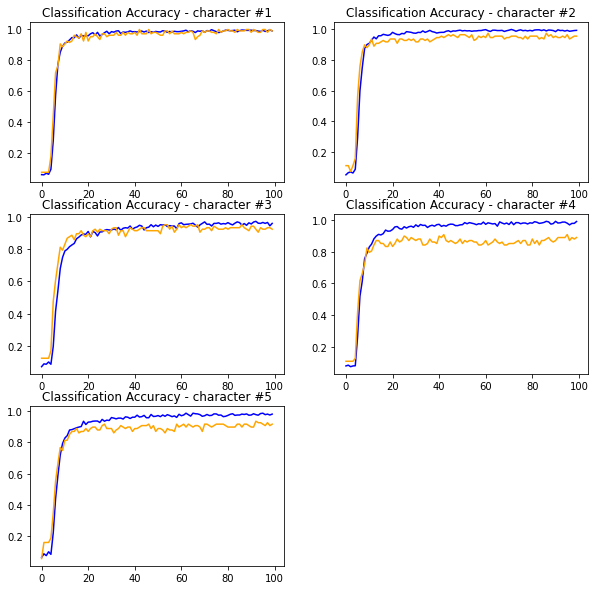

In [147]:
accuracy_plot(CNN1, 'dense_11', 'dense_13', 'dense_15', 'dense_17', 'dense_19')

In [148]:
prediction1 = np.asarray(model1.predict(test_X))

In [149]:
misclass_list1 = accuracy_reporting(prediction1, test_outputs)

Percentage accuracy (individual character): 94.76635514018692
Percentage accuracy (full captcha): 82.2429906542056


In [160]:
misclass_sum(misclass_list1)

Grouping by Expected vs Predicted Character
                    Count  Pct Share
Expected Predicted                  
3        2              1   3.571429
         5              1   3.571429
         b              2   7.142857
         e              1   3.571429
4        7              1   3.571429
5        c              1   3.571429
6        5              1   3.571429
         m              1   3.571429
7        m              1   3.571429
8        b              1   3.571429
         w              1   3.571429
b        6              1   3.571429
         d              1   3.571429
         f              1   3.571429
c        8              1   3.571429
e        b              1   3.571429
f        4              1   3.571429
         b              1   3.571429
m        n              3  10.714286
n        2              1   3.571429
         m              3  10.714286
w        m              1   3.571429
y        p              1   3.571429
Grouping by Location of Predict

Model 2: From Model 1, increase neurons for the second last dense layer

(Conv 3x3x16) (Conv 3x3x16) (MaxPool 2x2) (Dropout 0.2) (Conv 3x3x32) (Conv 3x3x32) (MaxPool 2x2) (Dropout 0.2) (Conv 3x3x64) (Conv 3x3x64) (MaxPool 2x2) (Dropout 0.2) (Flatten) -> [5 parallel stacks of] (Dense 128) (Dropout 0.2) (Dense 36)

In [162]:
image=keras.layers.Input((50,200,1))
conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)
conv2=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(conv1)
mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
drop1=keras.layers.Dropout(0.2)(mp1)
conv3=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(drop1)
conv4=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(conv3)
mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv4)
drop2=keras.layers.Dropout(0.2)(mp2)
conv5=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(drop2)
conv6=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(conv5)
mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv6)
drop3=keras.layers.Dropout(0.2)(mp3)
flat=keras.layers.Flatten()(drop3)

out=[]
for i in range(5):     # 5 is the number of characters in the captcha.
    den1=keras.layers.Dense(128,activation='relu')(flat)
    drop4=keras.layers.Dropout(0.2)(den1)
    den2=keras.layers.Dense(36,activation='softmax')(drop4)
    out.append(den2)
model2=keras.Model(image,out)

In [163]:
model2.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 50, 200, 16)  160         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 50, 200, 16)  2320        conv2d_12[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_13[0][0]                  
____________________________________________________________________________________________

In [164]:
CNN2 = model2.fit(train_X, [train_Y[0], train_Y[1], train_Y[2], train_Y[3], train_Y[4]], batch_size=32, epochs=100,validation_data=(validation_X,[validation_Y[0],validation_Y[1],validation_Y[2],validation_Y[3],validation_Y[4]]))
CNN2

Epoch 1/100
27/27 [==============================] - 3s 42ms/step - loss: 16.8607 - dense_21_loss: 3.3360 - dense_23_loss: 3.4263 - dense_25_loss: 3.3193 - dense_27_loss: 3.3968 - dense_29_loss: 3.3822 - dense_21_accuracy: 0.0497 - dense_23_accuracy: 0.0383 - dense_25_accuracy: 0.0625 - dense_27_accuracy: 0.0670 - dense_29_accuracy: 0.0454 - val_loss: 15.5513 - val_dense_21_loss: 3.1024 - val_dense_23_loss: 3.1159 - val_dense_25_loss: 3.1357 - val_dense_27_loss: 3.1206 - val_dense_29_loss: 3.0767 - val_dense_21_accuracy: 0.0748 - val_dense_23_accuracy: 0.1121 - val_dense_25_accuracy: 0.1215 - val_dense_27_accuracy: 0.1121 - val_dense_29_accuracy: 0.1589
Epoch 2/100
27/27 [==============================] - 1s 22ms/step - loss: 15.3421 - dense_21_loss: 3.0421 - dense_23_loss: 3.0865 - dense_25_loss: 3.0638 - dense_27_loss: 3.0874 - dense_29_loss: 3.0623 - dense_21_accuracy: 0.0777 - dense_23_accuracy: 0.0835 - dense_25_accuracy: 0.0788 - dense_27_accuracy: 0.0649 - dense_29_accuracy: 0.0

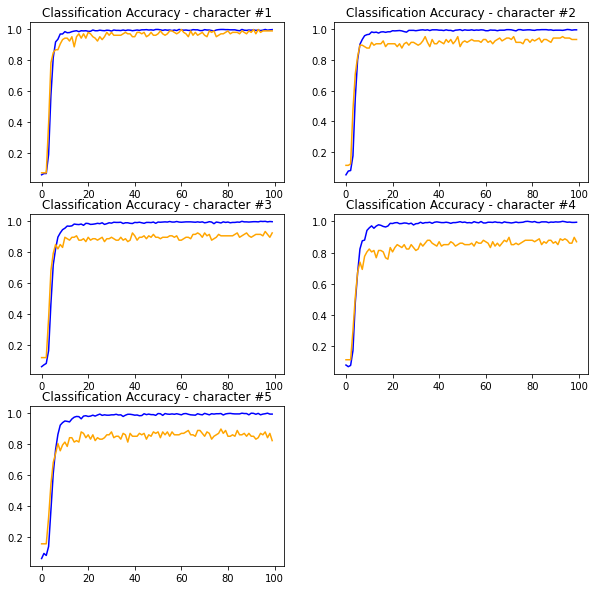

In [165]:
accuracy_plot(CNN2, 'dense_21', 'dense_23', 'dense_25', 'dense_27', 'dense_29')

In [166]:
prediction2 = np.asarray(model2.predict(test_X))

In [168]:
misclass_list2 = accuracy_reporting(prediction2, test_outputs)

Percentage accuracy (individual character): 91.4018691588785
Percentage accuracy (full captcha): 67.28971962616822


In [169]:
misclass_sum(misclass_list2)

Grouping by Expected vs Predicted Character
                    Count  Pct Share
Expected Predicted                  
2        5              1   2.173913
3        7              4   8.695652
         e              1   2.173913
6        e              4   8.695652
         n              1   2.173913
7        w              1   2.173913
b        4              1   2.173913
         e              1   2.173913
         f              1   2.173913
         n              2   4.347826
c        6              1   2.173913
         w              2   4.347826
         x              1   2.173913
d        n              1   2.173913
         p              1   2.173913
e        5              1   2.173913
f        4              1   2.173913
         7              1   2.173913
         n              1   2.173913
g        p              1   2.173913
m        d              1   2.173913
         n              9  19.565217
         w              1   2.173913
n        m              3   6.5

Model 3: From Model 1, increase drop out rate for later layers since the more "advanced" features should be more generalized

(Conv 3x3x16) (Conv 3x3x16) (MaxPool 2x2) (Dropout 0.2) (Conv 3x3x32) (Conv 3x3x32) (MaxPool 2x2) (Dropout 0.3) (Conv 3x3x64) (Conv 3x3x64) (MaxPool 2x2) (Dropout 0.4) (Flatten) -> [5 parallel stacks of] (Dense 64) (Dropout 0.4) (Dense 36)

In [170]:
image=keras.layers.Input((50,200,1))
conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)
conv2=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(conv1)
mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
drop1=keras.layers.Dropout(0.2)(mp1)
conv3=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(drop1)
conv4=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(conv3)
mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv4)
drop2=keras.layers.Dropout(0.3)(mp2)
conv5=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(drop2)
conv6=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(conv5)
mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv6)
drop3=keras.layers.Dropout(0.4)(mp3)
flat=keras.layers.Flatten()(drop3)

out=[]
for i in range(5):     # 5 is the number of characters in the captcha.
    den1=keras.layers.Dense(64,activation='relu')(flat)
    drop4=keras.layers.Dropout(0.4)(den1)
    den2=keras.layers.Dense(36,activation='softmax')(drop4)
    out.append(den2)
model3=keras.Model(image,out)

In [171]:
model3.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 50, 200, 16)  160         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 50, 200, 16)  2320        conv2d_18[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [172]:
CNN3 = model3.fit(train_X, [train_Y[0], train_Y[1], train_Y[2], train_Y[3], train_Y[4]], batch_size=32, epochs=100,validation_data=(validation_X,[validation_Y[0],validation_Y[1],validation_Y[2],validation_Y[3],validation_Y[4]]))
CNN3

Epoch 1/100
27/27 [==============================] - 3s 40ms/step - loss: 17.3479 - dense_31_loss: 3.4530 - dense_33_loss: 3.5107 - dense_35_loss: 3.4505 - dense_37_loss: 3.4497 - dense_39_loss: 3.4840 - dense_31_accuracy: 0.0318 - dense_33_accuracy: 0.0326 - dense_35_accuracy: 0.0626 - dense_37_accuracy: 0.0473 - dense_39_accuracy: 0.0767 - val_loss: 16.5627 - val_dense_31_loss: 3.2709 - val_dense_33_loss: 3.3699 - val_dense_35_loss: 3.2986 - val_dense_37_loss: 3.2960 - val_dense_39_loss: 3.3273 - val_dense_31_accuracy: 0.0748 - val_dense_33_accuracy: 0.1121 - val_dense_35_accuracy: 0.1215 - val_dense_37_accuracy: 0.1121 - val_dense_39_accuracy: 0.1589
Epoch 2/100
27/27 [==============================] - 1s 21ms/step - loss: 16.3299 - dense_31_loss: 3.2685 - dense_33_loss: 3.3290 - dense_35_loss: 3.2558 - dense_37_loss: 3.1867 - dense_39_loss: 3.2897 - dense_31_accuracy: 0.0519 - dense_33_accuracy: 0.0607 - dense_35_accuracy: 0.0846 - dense_37_accuracy: 0.0583 - dense_39_accuracy: 0.0

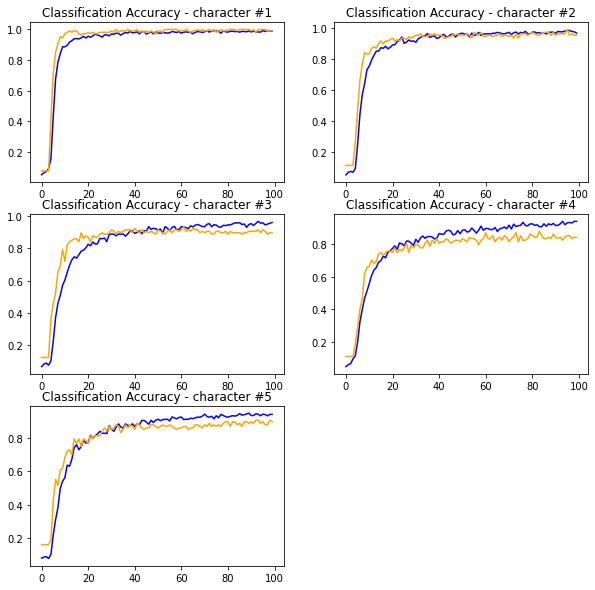

In [173]:
accuracy_plot(CNN3, 'dense_31', 'dense_33', 'dense_35', 'dense_37', 'dense_39')

In [174]:
prediction3 = np.asarray(model3.predict(test_X))

In [175]:
misclass_list3 = accuracy_reporting(prediction3, test_outputs)

Percentage accuracy (individual character): 94.39252336448598
Percentage accuracy (full captcha): 79.43925233644859


In [176]:
misclass_sum(misclass_list3)

Grouping by Expected vs Predicted Character
                    Count  Pct Share
Expected Predicted                  
2        5              1   3.333333
3        c              2   6.666667
         e              1   3.333333
         f              1   3.333333
         n              1   3.333333
5        6              1   3.333333
6        f              1   3.333333
         m              1   3.333333
         n              1   3.333333
         w              1   3.333333
7        m              1   3.333333
         x              1   3.333333
8        m              1   3.333333
         w              1   3.333333
b        d              1   3.333333
         f              2   6.666667
c        e              1   3.333333
d        4              1   3.333333
e        3              1   3.333333
         5              1   3.333333
g        p              1   3.333333
m        n              3  10.000000
n        7              1   3.333333
         f              1   3.3

Model 4: From Model 3, (i) add one more stack of convo-convo-maxpool-dropout layers with 128 feature before flattening, (ii) change the first dense layer to 128 neurons to match, (iii) adjust dropout rate accordingly, (iv) increase to 200 epoch.

(Conv 3x3x16) (Conv 3x3x16) (MaxPool 2x2) (Dropout 0.2) (Conv 3x3x32) (Conv 3x3x32) (MaxPool 2x2) (Dropout 0.3) (Conv 3x3x64) (Conv 3x3x64) (MaxPool 2x2) (Dropout 0.4) (Conv 3x3x128) (Conv 3x3x128) (MaxPool 2x2) (Dropout 0.5)(Flatten) -> [5 parallel stacks of] (Dense 128) (Dropout 0.5) (Dense 36)

In [177]:
image=keras.layers.Input((50,200,1))
conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)
conv2=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(conv1)
mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
drop1=keras.layers.Dropout(0.2)(mp1)
conv3=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(drop1)
conv4=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(conv3)
mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv4)
drop2=keras.layers.Dropout(0.3)(mp2)
conv5=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(drop2)
conv6=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(conv5)
mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv6)
drop3=keras.layers.Dropout(0.4)(mp3)
conv7=keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(drop3)
conv8=keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(conv7)
mp4=keras.layers.MaxPooling2D((2,2),padding='same')(conv8)
drop4=keras.layers.Dropout(0.5)(mp4)
flat=keras.layers.Flatten()(drop4)

out=[]
for i in range(5):     # 5 is the number of characters in the captcha.
    den1=keras.layers.Dense(128,activation='relu')(flat)
    drop5 = keras.layers.Dropout(0.5)(den1)
    den2 = keras.layers.Dense(36,activation='softmax')(drop5)
    out.append(den2)
model4=keras.Model(image,out)

In [178]:
model4.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 50, 200, 16)  160         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 50, 200, 16)  2320        conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_25[0][0]                  
____________________________________________________________________________________________

In [179]:
CNN4 = model4.fit(train_X, [train_Y[0], train_Y[1], train_Y[2], train_Y[3], train_Y[4]], batch_size=32, epochs=200,validation_data=(validation_X,[validation_Y[0],validation_Y[1],validation_Y[2],validation_Y[3],validation_Y[4]]))
CNN4

Epoch 1/200
27/27 [==============================] - 3s 44ms/step - loss: 17.2154 - dense_41_loss: 3.4340 - dense_43_loss: 3.4310 - dense_45_loss: 3.4604 - dense_47_loss: 3.4343 - dense_49_loss: 3.4558 - dense_41_accuracy: 0.0440 - dense_43_accuracy: 0.0522 - dense_45_accuracy: 0.0579 - dense_47_accuracy: 0.0429 - dense_49_accuracy: 0.0510 - val_loss: 16.2426 - val_dense_41_loss: 3.2805 - val_dense_43_loss: 3.2056 - val_dense_45_loss: 3.2849 - val_dense_47_loss: 3.2253 - val_dense_49_loss: 3.2463 - val_dense_41_accuracy: 0.0748 - val_dense_43_accuracy: 0.1121 - val_dense_45_accuracy: 0.1215 - val_dense_47_accuracy: 0.1121 - val_dense_49_accuracy: 0.1589
Epoch 2/200
27/27 [==============================] - 1s 22ms/step - loss: 15.8744 - dense_41_loss: 3.2148 - dense_43_loss: 3.1673 - dense_45_loss: 3.2171 - dense_47_loss: 3.1048 - dense_49_loss: 3.1703 - dense_41_accuracy: 0.0713 - dense_43_accuracy: 0.0521 - dense_45_accuracy: 0.0815 - dense_47_accuracy: 0.0912 - dense_49_accuracy: 0.0

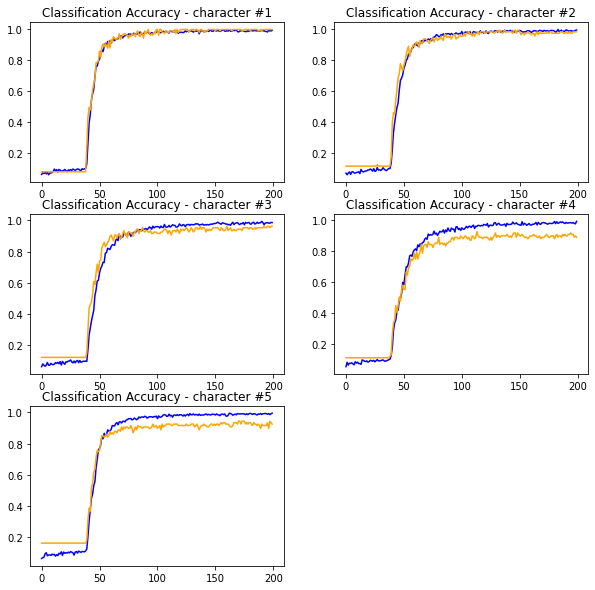

In [180]:
accuracy_plot(CNN4, 'dense_41', 'dense_43', 'dense_45', 'dense_47', 'dense_49')

In [181]:
prediction4 = np.asarray(model4.predict(test_X))

In [182]:
misclass_list4 = accuracy_reporting(prediction4, test_outputs)

Percentage accuracy (individual character): 95.14018691588785
Percentage accuracy (full captcha): 79.43925233644859


In [183]:
misclass_sum(misclass_list4)

Grouping by Expected vs Predicted Character
                    Count  Pct Share
Expected Predicted                  
3        4              1   3.846154
         7              2   7.692308
         f              1   3.846154
5        8              1   3.846154
6        m              1   3.846154
7        6              1   3.846154
         n              1   3.846154
8        x              1   3.846154
c        8              1   3.846154
         e              1   3.846154
d        4              1   3.846154
f        b              1   3.846154
         m              1   3.846154
m        n              9  34.615385
n        2              1   3.846154
         m              2   7.692308

Grouping by Location of Prediction Error
               Count  Pct Share
Char Position                  
0                  1   3.846154
1                  3  11.538462
2                 10  38.461538
3                 11  42.307692
4                  1   3.846154
